In [1]:
import gym
import MCTSnet
import copy
import torch

In [2]:
env = gym.make("SokobanEnc-v0")

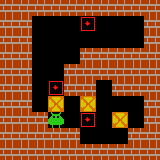

In [3]:
env.render()

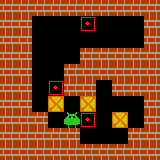

In [4]:
res = env.step(3)
env.render()

In [5]:
e = MCTSnet.models.embedding.Epsilon()

In [6]:
state = torch.Tensor(res[0])
state.reshape((-1,4,10,10)).shape

torch.Size([1, 4, 10, 10])

In [7]:
embed = e.forward(state.reshape((-1, 4, 10, 10)))

In [8]:
reward = torch.tensor([res[1]], requires_grad=True)
action = torch.tensor([3.], requires_grad=True)

In [9]:
b = MCTSnet.models.backup.BetaMLP()

In [10]:
h_s = b(embed, embed, reward.reshape((-1, 1)), action.reshape((-1, 1)))

In [11]:
r = MCTSnet.models.readout.Rho()

In [12]:
r(h_s)

tensor([[0.1223, 0.1235, 0.1356, 0.1405, 0.1300, 0.1197, 0.1166, 0.1118]],
       grad_fn=<SoftmaxBackward>)